<a href="https://colab.research.google.com/github/Gamali-Star1/30DaysOfJava/blob/master/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [8]:
!git clone https://github.com/Gamali-Star1/Sentiment_Project


Cloning into 'Sentiment_Project'...


In [1]:
# Install the required package(s)
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 4.6 MB/s eta 0:00:00


In [2]:
# Importing necessary libraries
import boto3 # This is boto3 package for interacting with AWS services
import pandas as pd # We import pandas library for data manipulation and analysis
import matplotlib.pyplot as plt # We import matplotlib for static, animated, and interactive visualization
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import logging # This is logging library used to configure and using logging in the scripts
import warnings # This is used to ignore warnings or to control the display of warning messages

warnings.filterwarnings('ignore') # This is used to ignore all warning and keeping of clean screen

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rbarrimond/gen-ai-msft/main/courier-service_reviews.csv')
df.head()

,id,review,sentiment
0,1,ExpressWay Logistics' commitment to transparen...,Positive
1,2,The tracking system implemented by ExpressWay ...,Positive
2,3,ExpressWay Logistics is a lifesaver when it co...,Positive
3,4,Expressway Logistics is the worst courier serv...,Negative
4,5,ExpressWay Logistics failed to meet my expecta...,Negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         131 non-null    int64 
 1   review     131 non-null    object
 2   sentiment  131 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


Loaded data columns: Index(['id', 'review', 'sentiment'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

       MIXED       0.00      0.00      0.00         0
    NEGATIVE       0.98      0.84      0.91        63
     NEUTRAL       0.00      0.00      0.00         0
    POSITIVE       1.00      0.87      0.93        68

    accuracy                           0.85       131
   macro avg       0.50      0.43      0.46       131
weighted avg       0.99      0.85      0.92       131

|   id | Text                                                  | Ground Truth Sentiment   | Predicted Sentiment   |
|-----:|:------------------------------------------------------|:-------------------------|:----------------------|
|    1 | ExpressWay Logistics' commitment to transparency g... | POSITIVE                 | POSITIVE              |
|    2 | The tracking system implemented by ExpressWay Logi... | POSITIVE                 | POSITIVE              |
|   

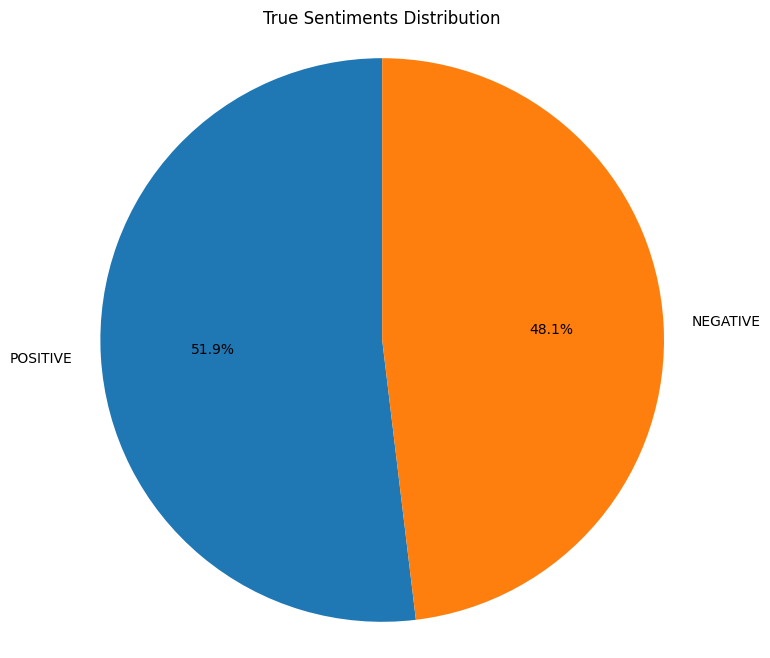

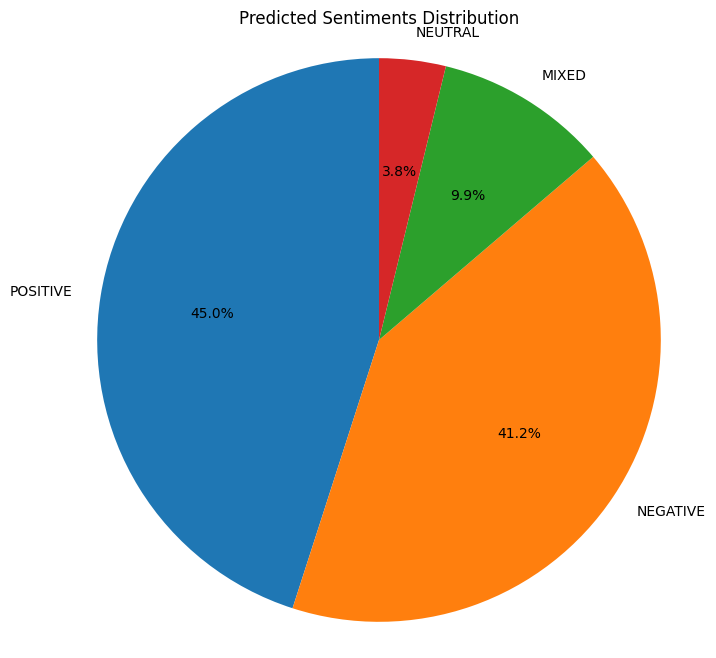

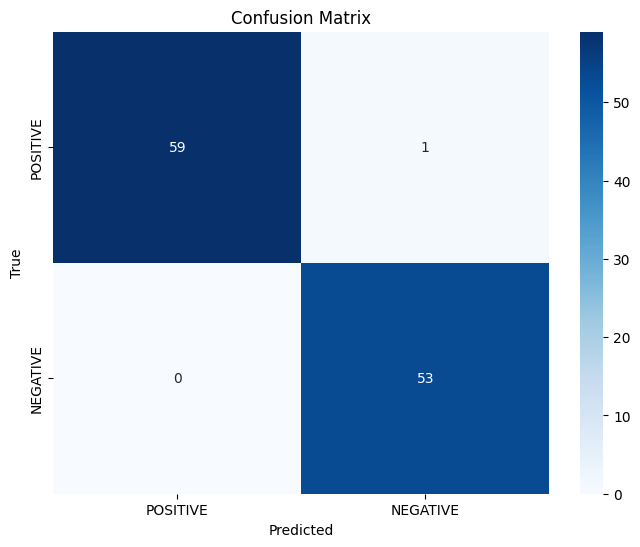

In [6]:


class AWSBedrockSentimentAnalyzer:
    """
     This is a class which used to interact with AWS Bedrock API for sentiment analysis.

    Attributes:
        client (boto3.client): The AWS Bedrock client.
        aws_accessId (str): The AWS credential to get accessId.
        aws_accessKey (str): The AWS credential to get accessKey.
        regionName (str): The AWS region name to be set, an by default it is 'us-east-1'.
    """ # This is a doc string used to explain the purpose and attribute of this class

    # Let us create a constructor method to initialize attribute
    def __init__(self, aws_accessId, aws_accessKey, regionName='us-east-1'):
      """
      We will design this function to be used to Initialize the AWSBedrockSentimentAnalyzer with the provided AWS credentials.

      Parameters:
          aws_accessId (str): The AWS access key ID.
          aws_accessKey (str): The AWS secret access key.
          region_name (str): The AWS region name.
      """
      self.client = boto3.client( # Intialize a boto3 client for AWS Comprehend services
          'comprehend', # Used to specify the AWS service to use (In this case it is AWS Comprehend for sentiment analysis)
          aws_access_key_id=aws_accessId, # Used to set AWS access key ID
          aws_secret_access_key=aws_accessKey, # Used to set the secret AWS access key
          region_name=regionName # Used to set the AWS region name (in this case it set 'us-east-1 which is default region setup')
      )

    def sentiment_analysis(self, text):
        """
        Analyzes the sentiment of a given text using AWS Bedrock API.

        Parameters:
            text (str): The text to analyze.

        Returns:
            str: The detected sentiment should be either 'POSITIVE', or 'NEGATIVE'.
        """
        try:
            response = self.client.detect_sentiment( # Used to call AWS Comprehend functionalities using API in order to detect sentiment in the give text
                Text=text, # Used to set the text to be analyzed by AWS Comprehend
                LanguageCode='en' # Used to set the language code for the text (in this case it is English)
            )
            sentiment = response['Sentiment'] # Used to get the sentiment detected by AWS Comprehend using API
            logger.info(f"Text: {text}, Sentiment: {sentiment}")
            return sentiment # This will return the sentiment detected by AWS Comprehnd
        except Exception as e: # This is exceptio handling errors which used to handle any exceptions that may occur during the API call
            logger.error(f"Error analyzing text: {text}")
            logger.exception(e) # This is used to log the exception details
            return None # This will return None if an exception occurs

def load_data_from_CSV_file(file_path):
    """
    Loads data from a CSV file.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        DataFrame: This function is used to lood datasets into pandas DataFrame, or will return None if the file will not be found.
    """
    try:
        df_data = pd.read_csv(file_path, on_bad_lines='skip')
        print(f"Loaded data columns: {df_data.columns}")
        return df_data
    except FileNotFoundError:
        logger.error(f"File not found: {file_path}")
        return None
    except pd.errors.ParserError as e:
        logger.error(f"ParserError: {e}")
        return None

def sentiments_evaluation(model, data):
    """
     This function will Evaluates the sentiments of texts in the dataset using the provided sentiment model.

    Parameters:
        analyzer (AWSBedrockSentimentAnalyzer): The sentiment model instance.
        data (DataFrame): Here, the dataset containing texts and ground truth sentiments.

    Returns:
        DataFrame: A DataFrame containing the id, text, ground truth sentiment, and predicted sentiment.
    """
    results = []  # This is used to store the results of the evaluation

    # The following codes will check if the necessary columns are present in dataframe, or if not return epty dataframe
    required_columns = ['review', 'sentiment', 'id']
    for column in required_columns:
        if column not in data.columns:
            logger.error(f"Required column '{column}' is not present in the data.")  # Log an error if a required column is missing.
            return pd.DataFrame(results)  # Return an empty DataFrame if any required column is missing.

    for index, row in data.iterrows():  # This is used to iterate over each row in the dataset
        text = row['review']  # This is used to get the text from the current row
        ground_truth_sentiment = row['sentiment'].upper()  # This is used to get the ground truth sentiment from the current row
        id = row['id']  # This is used to get the id from the current row

        # The following codes will analyze sentiment using AWS Bedrock, if they detect they will return dataframe with resuslts
        predicted_sentiment = model.sentiment_analysis(text)

        if predicted_sentiment:  # This is used to check if the predicted sentiment is not None
            results.append({  # This is used to append the results to the list
                'id': id,
                'Text': text,
                'Ground Truth Sentiment': ground_truth_sentiment,
                'Predicted Sentiment': predicted_sentiment
            })

    return pd.DataFrame(results)  # This will return the DataFrame with the results

def text_length_minimization(df, textColumn, maxLength=50):
    """
    Minimizes the text length in the DataFrame in the text calumn in orde to fit to allow all columns to fit in output display..

    Parameters:
        df (DataFrame): This is the DataFrame which contains text.
        text_column (str): This is the column which contains the text which are required to be minimize
        max_length (int): This provides the maximum length of text to display.

    Returns:
        DataFrame: The DataFrame with minimized text length.
    """
    texts_shortened = []  # Initialize an empty list to store shortened texts.
    for text in df[textColumn]: # Iterate over each text in the specified column.
        # Below lines of codes try to check, If the length of the text is greater than the maximum length, truncate it.
        if len(text) > maxLength:
            texts_shortened.append(text[:maxLength] + '...')
        else:
            texts_shortened.append(text)  # If text is within the limit, keep it unchanged.

    df[textColumn] = texts_shortened  # Update the DataFrame column with the shortened texts.
    return df  # Return the updated DataFrame.

def pie_chart_visualization(sentiments, title):
    """
    This function will be used to Plot a pie chart of sentiments.

    Parameters:
        sentiments (list): List of sentiments.
        title (str): Title of the pie chart.
    """
    sentiment_counts = pd.Series(sentiments).value_counts()  # Used Count the occurrences of each sentiment

    # Below are figure, pie, title, axis, ylabel, and show functions which used to plot pie chart visualization
    plt.figure(figsize=(8, 8))
    sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')
    plt.ylabel('')
    plt.show()

def heatmap_visualization(true_sentiments, predicted_sentiments):
    """
    This function used to plots a heatmap of the confusion matrix in order to visualize for true vs predicted sentiments.

    Parameters:
        true_sentiments (list): List of true sentiments.
        predicted_sentiments (list): List of sentiments which are predicted.
    """
    # The following are confusion matrix, figure, heatmap, title, xlabel, ylabel, and show functions which used to compute the comfusion matix heatmap visualization
    # Calculate the confusion matrix using true and predicted sentiments
    cm = confusion_matrix(true_sentiments, predicted_sentiments, labels=['POSITIVE', 'NEGATIVE'])

    # Create a new figure for the heatmap with the specified size
    plt.figure(figsize=(8, 6))

    # Here, we are going to plot the heatmap with the confusion matrix data
    sns.heatmap(cm,  # Confusion matrix data
                annot=True,  # Annotate each cell with the numeric value
                fmt='d',  # Use integer format for the annotations
                cmap='Blues',  # Color map to use for the heatmap
                xticklabels=['POSITIVE', 'NEGATIVE'],  # Here we will label the columns of the heatmap
                yticklabels=['POSITIVE', 'NEGATIVE'])  # And then we will label the rows of the heatmap
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def main():
    """
    This is a main function used to run the sentiment analysis and evaluation.

    It initializes the sentiment analyzer, loads the data, evaluates the sentiments, and prints the classification report.
    """
    aws_accessId = 'accessId'  # Replace with your actual AWS access key ID
    aws_accessKey = 'accessKey'  # Replace with your actual AWS secret access key

    # Initialize the sentiment analyzer with AWS credentials
    analyzer = AWSBedrockSentimentAnalyzer(aws_accessId, aws_accessKey)

    # Load data from the specified CSV file
    data = load_data_from_CSV_file('https://raw.githubusercontent.com/rbarrimond/gen-ai-msft/main/courier-service_reviews.csv')

    if data is not None:
        # Let us Evaluate sentiments and get results DataFrame
        results_df = sentiments_evaluation(analyzer, data)

        if not results_df.empty:
            # This will Minimize text length for display
            results_df = text_length_minimization(results_df, 'Text')

            # Now, we do Print the classification report for the sentiment analysis
            print("Classification Report:")
            print(classification_report(results_df['Ground Truth Sentiment'], results_df['Predicted Sentiment'], zero_division=0))

            # Now we are displaying the results DataFrame
            with pd.option_context('display.max_colwidth', None):  # Ensure the text is fully displayed
                print(results_df.to_markdown(index=False))

            # Now, we are plotting pie chart for true sentiments
            pie_chart_visualization(results_df['Ground Truth Sentiment'], 'True Sentiments Distribution')

            # Now, we are plotting pie chart for predicted sentiments
            pie_chart_visualization(results_df['Predicted Sentiment'], 'Predicted Sentiments Distribution')

            # Now, we are plotting heatmap
            heatmap_visualization(results_df['Ground Truth Sentiment'], results_df['Predicted Sentiment'])
        else:
            print("No valid data for evaluation.")
    else:
        print("Failed to load data.")

if __name__ == '__main__':
    main()
